## 数据预处理
### 数据质量：缺失值处理、异常处理、重复数据
### 数据结构：格式转化、数据合并

#### 1. 删除重复数据，并输出去重前后的数据量

In [7]:
import pandas as pd

# 读取CSV文件
file_path = 'github_bot_raw_data.csv'
data = pd.read_csv(file_path)

# 输出去重前的数据量
original_count = len(data)
print(f"去重前的数据量: {original_count}")

# 删除重复数据
data_deduplicated = data.drop_duplicates()

# 输出去重后的数据量
deduplicated_count = len(data_deduplicated)
print(f"去重后的数据量: {deduplicated_count}")

# 保存去重后的数据到新文件
output_file_path = 'result/result1.csv'
data_deduplicated.to_csv(output_file_path, index=False)


去重前的数据量: 20358
去重后的数据量: 19779


#### 2.缺失值处理
##### 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
##### 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量，文本数据用空字符串填充空值......
##### 最后，再次看各列有无缺失值

In [6]:
import pandas as pd

# 读取CSV文件
file_path = 'github_bot_raw_data.csv'
data = pd.read_csv(file_path)

# 去掉 gravatar_id 列
data = data.drop(columns=['gravatar_id'])

# 查看各列的缺失值情况
missing_values_before = data.isnull().sum()
print("去掉 gravatar_id 列后各列的缺失值情况:")
print(missing_values_before)

# 将可转化成 boolean 变量的列字段转化成 boolean 变量
# 假设列名包含 'is_' 或 'has_' 的字段为布尔变量，其他需要用户提供列名
boolean_columns = [col for col in data.columns if col.startswith('is_') or col.startswith('has_')]
for col in boolean_columns:
    data[col] = data[col].fillna(False).astype(bool)

# 将文本数据用空字符串填充空值
text_columns = data.select_dtypes(include=['object']).columns
data[text_columns] = data[text_columns].fillna('')

# 再次查看各列的缺失值情况
missing_values_after = data.isnull().sum()
print("处理后各列的缺失值情况:")
print(missing_values_after)

# 保存处理后的数据到新文件
output_file_path = 'result/result2.csv'
data.to_csv(output_file_path, index=False)


去掉 gravatar_id 列后各列的缺失值情况:
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2654
company                 9229
blog                   11601
location                7287
email                  12079
hireable               16956
bio                    11262
twitter_username       15297
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64
处理后

#### 3.数据变换，将created_at、updated_at转为时间戳

In [5]:
import pandas as pd

# 读取CSV文件
file_path = 'github_bot_raw_data.csv'
data = pd.read_csv(file_path)

# 将 'created_at' 和 'updated_at' 列转换为时间戳
data['created_at'] = pd.to_datetime(data['created_at']).astype('int64') // 10**9
data['updated_at'] = pd.to_datetime(data['updated_at']).astype('int64') // 10**9

# 保存转换后的数据到新文件
output_file_path = 'result/result3.csv'
data.to_csv(output_file_path, index=False)

print(f"数据已保存到 {output_file_path}")

数据已保存到 result/result3.csv


#### 4.数据可视化
##### 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
##### 4.2 可视化bot类型账号的活跃情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
##### 4.3 可视化human类型账号的活跃情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
##### 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
##### 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

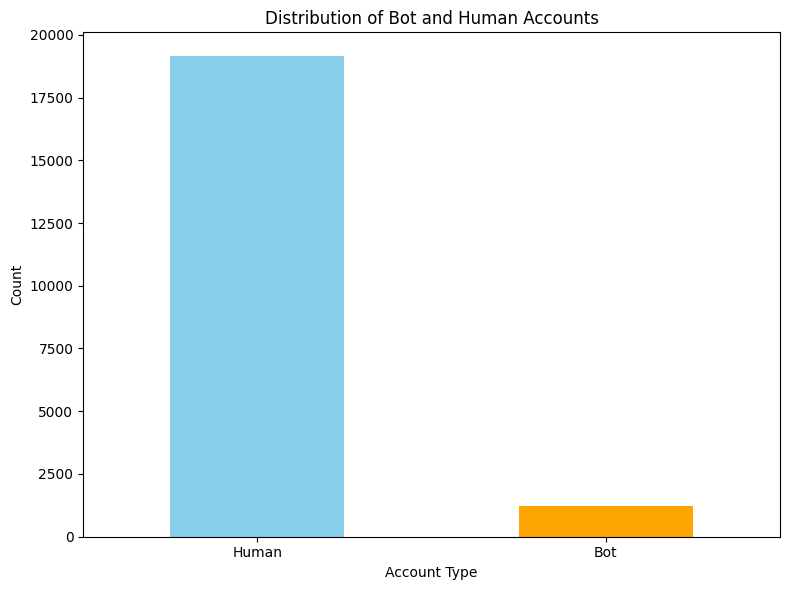

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = 'github_bot_raw_data.csv'
data = pd.read_csv(file_path)

# 4.1 统计bot和human类型的数量
bot_human_counts = data['label'].value_counts()

# 绘制条形图
plt.figure(figsize=(8, 6))
bot_human_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Bot and Human Accounts')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# 保存图表
plt.savefig('picture/bot_human_distribution_4-1.png')
plt.show()



C:\Users\23162\AppData\Local\Temp\ipykernel_39532\3257344816.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_data['created_at'] = pd.to_datetime(bot_data['created_at'], errors='coerce')
C:\Users\23162\AppData\Local\Temp\ipykernel_39532\3257344816.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_data['year'] = bot_data['created_at'].dt.year


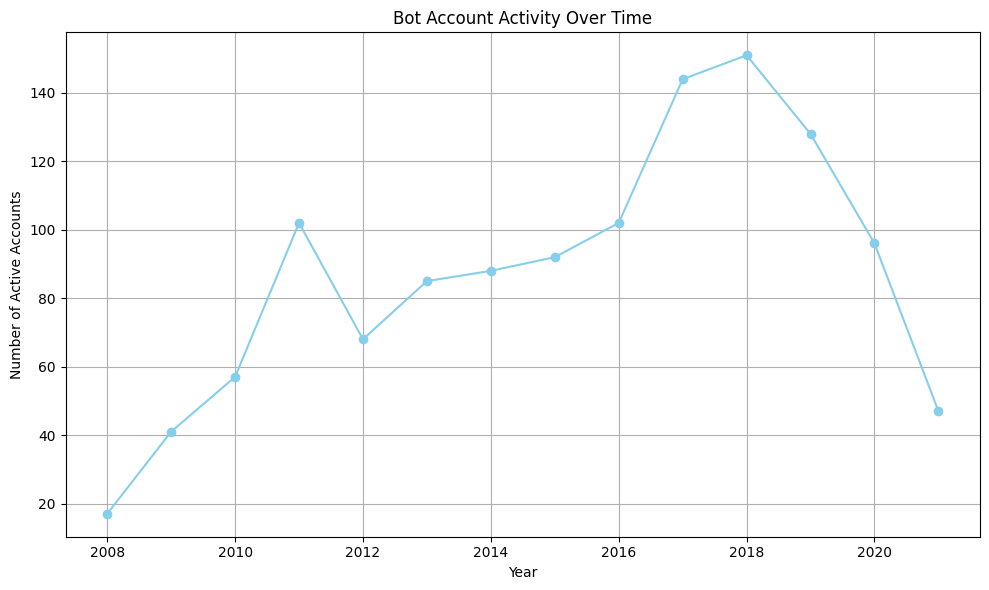

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = 'github_bot_raw_data.csv'
data = pd.read_csv(file_path)


# 4.2 过滤出bot类型的数据
bot_data = data[data['label'] == 'Bot']


# 将created_at列转换为时间戳
bot_data['created_at'] = pd.to_datetime(bot_data['created_at'], errors='coerce')
bot_data['year'] = bot_data['created_at'].dt.year


# 绘制折线图
plt.figure(figsize=(10, 6))
bot_activity.plot(kind='line', marker='o', linestyle='-', color='skyblue')
plt.title('Bot Account Activity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Active Accounts')
plt.grid(True)
plt.tight_layout()

# 保存图表
plt.savefig('picture/bot_activity_over_time_4-2.png')
plt.show()


C:\Users\23162\AppData\Local\Temp\ipykernel_39532\1681876989.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_data['created_at'] = pd.to_datetime(human_data['created_at'])
C:\Users\23162\AppData\Local\Temp\ipykernel_39532\1681876989.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_data['year'] = human_data['created_at'].dt.year


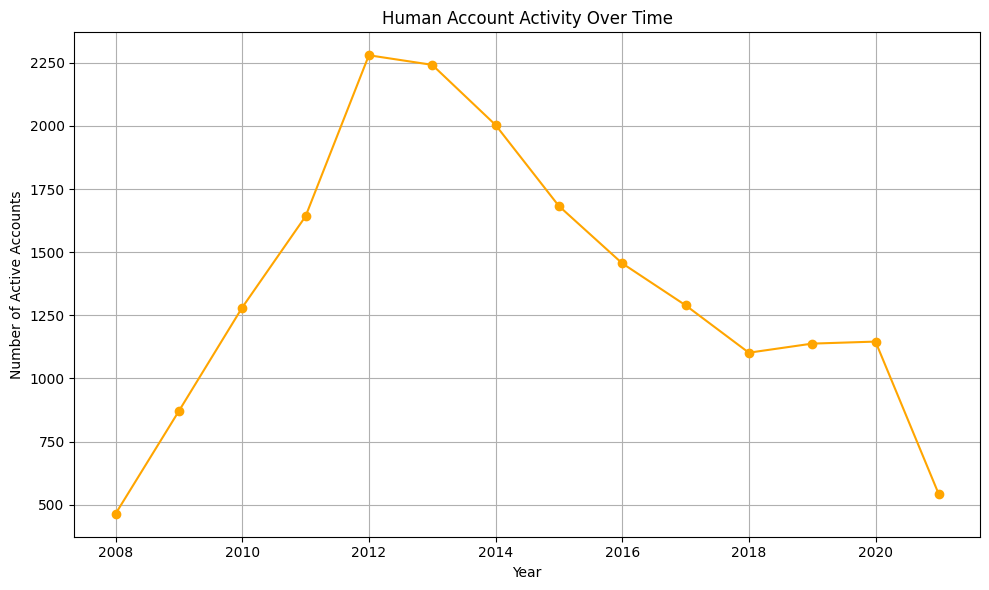

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = 'github_bot_raw_data.csv'
data = pd.read_csv(file_path)

# 4.3 过滤出human类型的数据
human_data = data[data['label'] == 'Human']

# 将created_at列转换为时间戳
human_data['created_at'] = pd.to_datetime(human_data['created_at'])
human_data['year'] = human_data['created_at'].dt.year

# 统计每年的活跃情况
human_activity = human_data['year'].value_counts().sort_index()

# 绘制折线图
plt.figure(figsize=(10, 6))
human_activity.plot(kind='line', marker='o', linestyle='-', color='orange')
plt.title('Human Account Activity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Active Accounts')
plt.grid(True)
plt.tight_layout()

# 保存图表
plt.savefig('picture/human_activity_over_time_4-3.png')
plt.show()

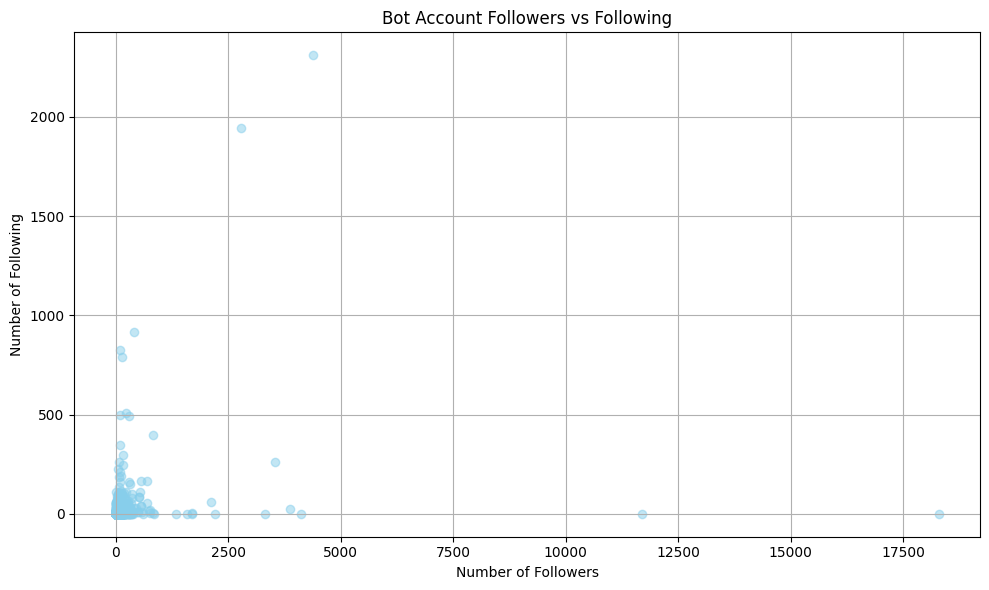

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = 'github_bot_raw_data.csv'
data = pd.read_csv(file_path)

# 4.4 绘制散点图 - Bot类型账号的followers和following情况
# 去除缺失值并确保数据类型为整数
bot_data = bot_data.dropna(subset=['followers', 'following'])
bot_data['followers'] = bot_data['followers'].astype(int)
bot_data['following'] = bot_data['following'].astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(bot_data['followers'], bot_data['following'], alpha=0.5, color='skyblue')
plt.title('Bot Account Followers vs Following')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Following')
plt.grid(True)
plt.tight_layout()

# 保存图表
plt.savefig('picture/bot_followers_vs_following_4-4.png')
plt.show()

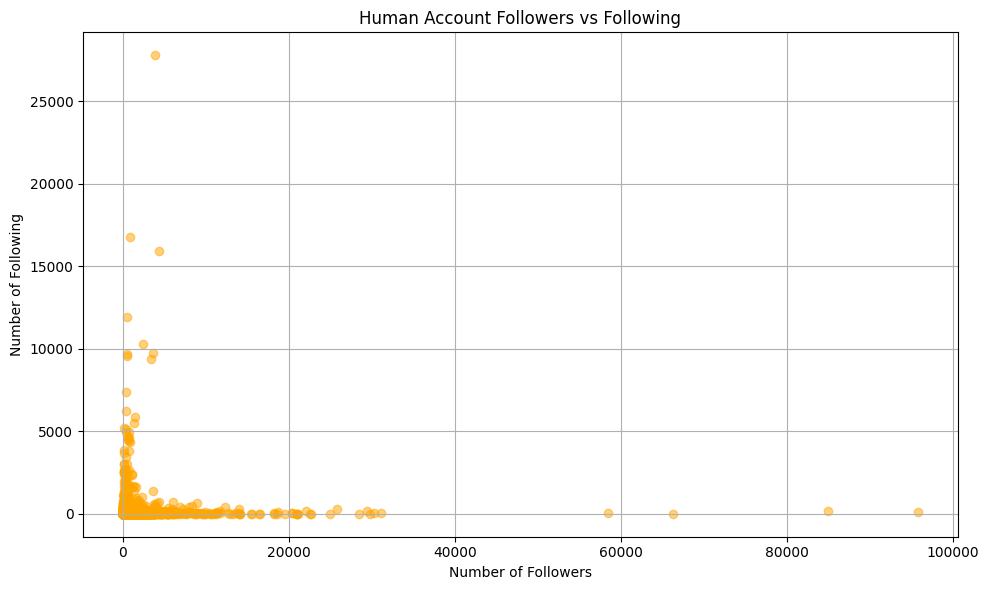

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = 'github_bot_raw_data.csv'
data = pd.read_csv(file_path)

# 4.5 绘制散点图 - Human类型账号的followers和following情况
# 去除缺失值并确保数据类型为整数
human_data = human_data.dropna(subset=['followers', 'following'])
human_data['followers'] = human_data['followers'].astype(int)
human_data['following'] = human_data['following'].astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(human_data['followers'], human_data['following'], alpha=0.5, color='orange')
plt.title('Human Account Followers vs Following')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Following')
plt.grid(True)
plt.tight_layout()

# 保存图表
plt.savefig('picture/human_followers_vs_following_4-5.png')
plt.show()